In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("weight-height (1) - weight-height (1).csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df['Gender'].value_counts()

Gender
Male      5000
Female    3555
Name: count, dtype: int64

In [5]:
le = LabelEncoder()

In [6]:
df['Gender'] = le.fit_transform(df['Gender'])

In [7]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [8]:
df.Gender.value_counts()

Gender
1    5000
0    3555
Name: count, dtype: int64

In [16]:
x = df.drop(['Gender'], axis= 1)
y = df[['Gender']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size= .2)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6844, 2), (6844, 1), (1711, 2), (1711, 1))

### Linear Model

In [9]:
lr = LinearRegression()

In [19]:
model1 = lr.fit(x_train, y_train)

In [21]:
print("Train score : ", model1.score(x_train, y_train))

Train score :  0.6328883311810236


In [22]:
print("Test score : ", model1.score(x_test, y_test))

Test score :  0.6645033849147478


In [20]:
pred_y = model1.predict(x_test)

In [23]:
pred_y

array([[0.40061044],
       [1.03308906],
       [0.63483012],
       ...,
       [0.74861532],
       [1.08347134],
       [0.55387876]], shape=(1711, 1))

In [24]:
df.Gender.value_counts()

Gender
1    5000
0    3555
Name: count, dtype: int64

In [32]:
m = lr.coef_
c = lr.intercept_

In [33]:
m

array([[-0.03977805,  0.01653339]])

In [40]:
c

array([0.50555744])

In [34]:
x_test.head()

,Height,Weight
6006,64.846644,149.668369
1197,68.886367,197.642244
2862,70.963369,178.551191
6497,62.737189,141.343095
2860,69.578030,195.322675


In [39]:
#  y = m1x + m2x + c
m

array([[-0.03977805,  0.01653339]])

In [44]:
y = ((m[0][0] * 68.886367) + (m[0][1] * 197.642244)) + c

In [45]:
y

array([1.03308905])

In [43]:
pred_y

array([[0.40061044],
       [1.03308906],
       [0.63483012],
       ...,
       [0.74861532],
       [1.08347134],
       [0.55387876]], shape=(1711, 1))

In [49]:
df['linear_model'] = model1.predict(df[['Height', 'Weight']])

In [50]:
df.head()

,Gender,Height,Weight,linear_model
0,1,73.847017,241.893563,1.567389
1,1,68.781904,162.310473,0.453090
2,1,74.110105,212.740856,1.074930
3,1,71.730978,220.042470,1.290288
4,1,69.881796,206.349801,1.137458


### Logistic Regression

In [46]:
log = LogisticRegression()

In [47]:
model2 = log.fit(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
pred_y2 = model2.predict(x_test)

In [52]:
pred_y2

array([0, 1, 1, ..., 1, 1, 1], shape=(1711,))

In [53]:
model2.predict_proba(x_test)

array([[0.75566716, 0.24433284],
       [0.00247356, 0.99752644],
       [0.18015699, 0.81984301],
       ...,
       [0.05751814, 0.94248186],
       [0.00140208, 0.99859792],
       [0.35492606, 0.64507394]], shape=(1711, 2))

In [54]:
model2.score(x_train, y_train)

0.9164231443600234

In [55]:
model2.score(x_test, y_test)

0.9228521332554062

In [56]:
accuracy_score(y_test, pred_y2)

0.9228521332554062

In [57]:
confusion_matrix(pred_y2, y_test)

array([[629,  55],
       [ 77, 950]])

In [62]:
# TP 
# FP 
# NP 
# FN 

from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, pred_y2))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       706
           1       0.93      0.95      0.94      1005

    accuracy                           0.92      1711
   macro avg       0.92      0.92      0.92      1711
weighted avg       0.92      0.92      0.92      1711



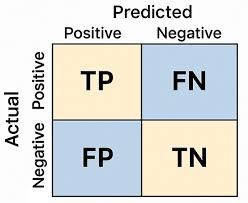

<Axes: >

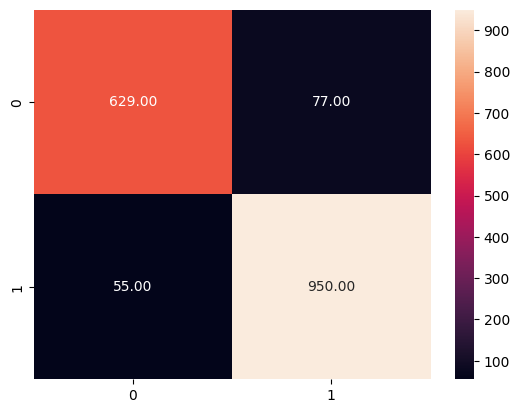

In [61]:
sns.heatmap(confusion_matrix(y_test, pred_y2), annot=True,fmt = '.2f')

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=5)
# KNeighborsRegressor

In [65]:
model3 = Knn.fit(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [66]:
pred_y3 = model3.predict(x_test)

In [67]:
pred_y3

array([0, 1, 1, ..., 1, 1, 1], shape=(1711,))

In [68]:
model3.score(x_train, y_train)

0.9282583284628872

In [69]:
model3.score(x_test, y_test)

0.9181765049678551

In [70]:
accuracy_score(y_test, pred_y3)

0.9181765049678551

In [71]:
confusion_matrix(y_test, pred_y3)

array([[630,  76],
       [ 64, 941]])